# Clustering - TFIDF

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

df = pd.read_csv('./data/Sample_FIT_News.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       160 non-null    object
 1   article     160 non-null    object
 2   file_links  160 non-null    object
 3   url         160 non-null    object
dtypes: object(4)
memory usage: 5.1+ KB


## Clustering

In [4]:
news = df['article'].to_list()

In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(news)

In [45]:
n_cluster  = 6

kmeans =KMeans(n_clusters=n_cluster)
kmeans.fit(X)

labels = kmeans.labels_

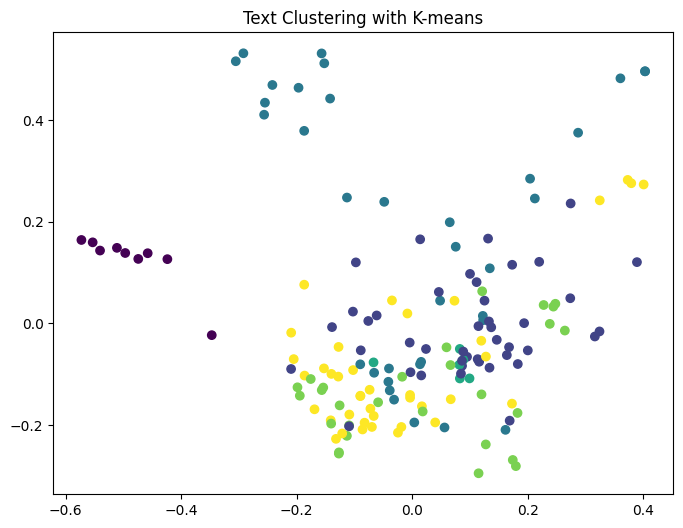

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Text Clustering with K-means")
plt.show()

In [47]:
df['labels'] = labels

In [48]:
df.head()

,title,article,file_links,url,labels
0,[CQ] Nghỉ học lớp Lý thuyết số 22_6 ngày 29/3/...,"\nTHÔNG BÁOLớp Lý thuyết số 22_6, lịch học T6 ...",[],https://www.fit.hcmus.edu.vn/tin-tuc/d/cq-nghi...,1
1,Chương trình Học bổng Chính phủ Australia (AAS...,\nPhòng Quan hệ Đối ngoại xin thông tin về Chư...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/chuong-...,1
2,"Lịch thi lớp BTKT ngành Khoa học máy tính, Hệ ...",\nTHÔNG BÁOLịch thi lớp BTKT ngành Khoa học má...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/lich-th...,1
3,THI ĐẤU CODE TOUR - CƠ HỘI “NÂNG CẤP” TOÀN DIỆ...,\nĐăng ký ngay: https://bit.ly/4bWtGGL Đếm ngư...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/thi-dau...,4
4,"Đăng ký học bổng ""Hành trang hướng nghiệp"" học...",\nNhằm khen thưởng cho những sinh viên có thàn...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/dang-ky...,4


## Assigning labels & surveying

In [58]:
df[df['labels']==0].sample(5)

,title,article,file_links,url,labels
56,QA Tester (AI Model & Functional Focus),\nOverviewWe are seeking a QA Tester with a st...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/qa-test...,0
140,BOOSTation: BỆ PHÓNG VỮNG CHẮC CHO DỰ ÁN KỸ TH...,\nBOOSTation: BỆ PHÓNG VỮNG CHẮC CHO DỰ ÁN KỸ ...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/boostat...,0
81,[Communication support] Bach Khoa Innovation 2024,\nBach Khoa Innovation (BKI) is an annual inno...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/communi...,0
97,BOUYGUES CONSTRUCTION IT VIETNAM - Hiring Net...,\nBouygues Construction IT Vietnam is a part\r...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/bouygue...,0
82,Junior DevOps Engineer (Golang),\nOur CompanyBioTuring is an innovative bioinf...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/junior-...,0


In [60]:
df[df['labels']==1].sample(5)

,title,article,file_links,url,labels
111,Thời khóa biểu có phòng các lớp Học phần 2 Khó...,\nTHÔNG BÁOThời khóa biểu có phòng các lớp Học...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/thoi-kh...,1
100,Thông báo lịch trình bày chương trình Trường h...,\nTiếp nối thành công của Trường hè về Trí tuệ...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/thong-b...,1
42,Chương trình học bổng Toshiba năm học 2024-2025,\nChương trình học bổng Toshiba nhằm hỗ trợ cá...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/chuong-...,1
49,Thời khóa biểu có phòng các lớp Học phần 3 Khó...,\nTHÔNG BÁOThời khóa biểu có phòng các lớp Học...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/thoi-kh...,1
25,"Danh sách sinh viên nhận học bổng ""Hành trang ...",\nBộ phận Trợ lý sinh viên thông báo danh sách...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/danh-sa...,1


In [50]:
df[df['labels']==2].sample(2)

,title,article,file_links,url,labels
85,[CQ] Quy trình nộp cuốn SAU bảo vệ KLTN/TTDATN...,\nTHÔNG BÁOGiáo vụ thông báo đến các bạn sinh ...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/cq-quy-...,2
129,[CQ] Thông báo nộp đơn đăng ký bảo vệ/ huỷ bảo...,\n​THÔNG BÁOBp. Giáo vụ thông báo các bạn sinh...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/cq-thon...,2


In [75]:
df[df['labels']==3]

,title,article,file_links,url,labels
14,Thông báo nộp đơn xin xét chuyên ngành đối với...,\nBP. Giáo vụ thông báo các bạn sinh viên đang...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/thong-b...,3
16,"Thông báo chỉ tiêu xét chuyên ngành Khóa 2022,...",\nTHÔNG BÁO(V/v chỉ tiêu chuyên ngành đợt xét ...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/thong-b...,3
20,Thông báo chuyên ngành chính thức cho sinh viê...,\nCác bạn sinh viên có xét chuyên ngành trong ...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/thong-b...,3
69,Vodcast giới thiệu ngành/ chuyên ngành Khoa Cô...,\nĐể giúp cho sinh viên có thể khám phá về các...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/vodcast...,3
72,Thông báo đăng ký nguyện vọng chuyên ngành Khó...,\nBP. Giáo vụ thông báo các bạn sinh viên bậc ...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/thong-b...,3
138,Về việc cập nhật thông tin chuyên ngành cho si...,\nBP Giáo vụ thông báo đến các bạn sinh viên v...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/ve-viec...,3


In [83]:
df[df['labels']==4].sample(2)

,title,article,file_links,url,labels
156,[CQ] Khảo sát nguyện vọng đăng ký đề tài KLTN/...,\nCác bạn sinh viên Khoa CNTT bậc ĐHCQ Khóa 20...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/cq-khao...,4
62,Thông báo đăng ký học phần Thực tập dành cho h...,\nKhoa Công nghệ thông tin (CNTT) chuyển đến c...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/thong-b...,4


In [95]:
df[df['labels']==5].sample(2)

,title,article,file_links,url,labels
103,Danh sách dự kiến cấp xét học bổng tân sinh vi...,\n1. Căn cứ xét học bổng:\nCăn cứ Quyết định s...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/danh-sa...,5
64,VNPT ĐẮK LẮK TUYỂN DỤNG,\nTHÔNG TIN TUYỂN DỤNG:Vị trí tuyển dụng:1. Kỹ...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/vnpt-da...,5


# Sampling

In [20]:
recruitment = [83,84,154,97,43]
timetable = [77,49,159,71,111]
scholarship = [22,91,7,5,63]
academic = [66,28,146,28,113]
events = [3,100,46,53,70]

In [21]:
shortened_df = df.iloc[recruitment+timetable+scholarship+academic+events]

In [36]:
shortened_df.loc[timetable, 'type'] = 'timetable'
shortened_df.loc[scholarship, 'type'] = 'scholarship'
shortened_df.loc[academic, 'type'] = 'academic_affairs'
shortened_df.loc[events, 'type'] = 'events'

In [37]:
shortened_df

,title,article,file_links,url,type
83,[FUJINET] Tuyển dụng FRESHER DEVELOPERS (JAVA/...,"\nĐịa điểm làm việc: Số 10 Phổ Quang, Phường 2...",[],https://www.fit.hcmus.edu.vn/tin-tuc/d/fujinet...,recruitment
84,Golden Owl Solutions Tuyển dụng Thực tập sinh ...,\nBENEFITSAllowance: 3.000.000 - 6.000.000 VND...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/golden-...,recruitment
154,[Lihuhu] Quality Assurance (Vietnamese) - ver ...,\nMOBILE GAMES - QUALITY ASSURANCEVề Lihuhu Vi...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/lihuhu-...,recruitment
97,BOUYGUES CONSTRUCTION IT VIETNAM - Hiring Net...,\nBouygues Construction IT Vietnam is a part\r...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/bouygue...,recruitment
43,"[Q2, Q.Bình Thạnh] Golden Owl Solutions Tuyển ...","\nKì thực tập đang đến gần, còn chờ gì nữa mà ...",[],https://www.fit.hcmus.edu.vn/tin-tuc/d/q2-qbin...,recruitment
77,Danh sách môn mở trong Học phần 3 lớp cao học ...,\nTHÔNG BÁODanh sách môn mở trong Học phần 3 l...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/danh-sa...,timetable
49,Thời khóa biểu có phòng các lớp Học phần 3 Khó...,\nTHÔNG BÁOThời khóa biểu có phòng các lớp Học...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/thoi-kh...,timetable
159,Đổi phòng lớp Xử lý ngôn ngữ tự nhiên nâng cao...,\nTHÔNG BÁOLớp Xử lý ngôn ngữ tự nhiên nâng ca...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/doi-pho...,timetable
71,Thời khóa biểu lý thuyết và thực hành lớp 22HC...,\nThông báoThời khóa biểu LT+TH HK2/2022-2023 ...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/thoi-kh...,timetable
111,Thời khóa biểu có phòng các lớp Học phần 2 Khó...,\nTHÔNG BÁOThời khóa biểu có phòng các lớp Học...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/thoi-kh...,timetable


In [39]:
shortened_df.to_csv('./data/sample_FIT_news_shortened.csv',index=False)

In [18]:
df.sample(5)

,title,article,file_links,url
58,Danh sách đề tài bảo vệ luận văn thạc sĩ đợt t...,\nTHÔNG BÁOHọc viên ngành Khoa học máy tính và...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\7...,https://www.fit.hcmus.edu.vn/tin-tuc/d/danh-sa...
156,[CQ] Khảo sát nguyện vọng đăng ký đề tài KLTN/...,\nCác bạn sinh viên Khoa CNTT bậc ĐHCQ Khóa 20...,[],https://www.fit.hcmus.edu.vn/tin-tuc/d/cq-khao...
120,Thông báo kết quả chính thức học bổng tân sinh...,\n1. Kết quả chính thức học bổng tân sinh viên...,['https://www.fit.hcmus.edu.vn/vn/UserFiles\\C...,https://www.fit.hcmus.edu.vn/tin-tuc/d/thong-b...
34,GÓC SẺ CHIA - WE TALK 2023,"\n""Góc sẻ chia - We talk"" của FIT.HCMUS đã trở...",[],https://www.fit.hcmus.edu.vn/tin-tuc/d/goc-se-...
43,"[Q2, Q.Bình Thạnh] Golden Owl Solutions Tuyển ...","\nKì thực tập đang đến gần, còn chờ gì nữa mà ...",[],https://www.fit.hcmus.edu.vn/tin-tuc/d/q2-qbin...
